In [22]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
data = pd.read_csv('train.csv')
data.shape

(381109, 12)

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
nums = ['Age','Annual_Premium','Vintage','Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel','Response',]
cats = ['Gender','Vehicle_Age','Vehicle_Damage',]

In [8]:
data[nums].describe()

,Age,Annual_Premium,Vintage,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397,0.997869,26.388807,0.458210,112.034295,0.122563
std,15.511611,17213.155057,83.671304,0.046110,13.229888,0.498251,54.203995,0.327936
min,20.000000,2630.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25.000000,24405.000000,82.000000,1.000000,15.000000,0.000000,29.000000,0.000000
50%,36.000000,31669.000000,154.000000,1.000000,28.000000,0.000000,133.000000,0.000000
75%,49.000000,39400.000000,227.000000,1.000000,35.000000,1.000000,152.000000,0.000000
max,85.000000,540165.000000,299.000000,1.000000,52.000000,1.000000,163.000000,1.000000


In [9]:
data[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


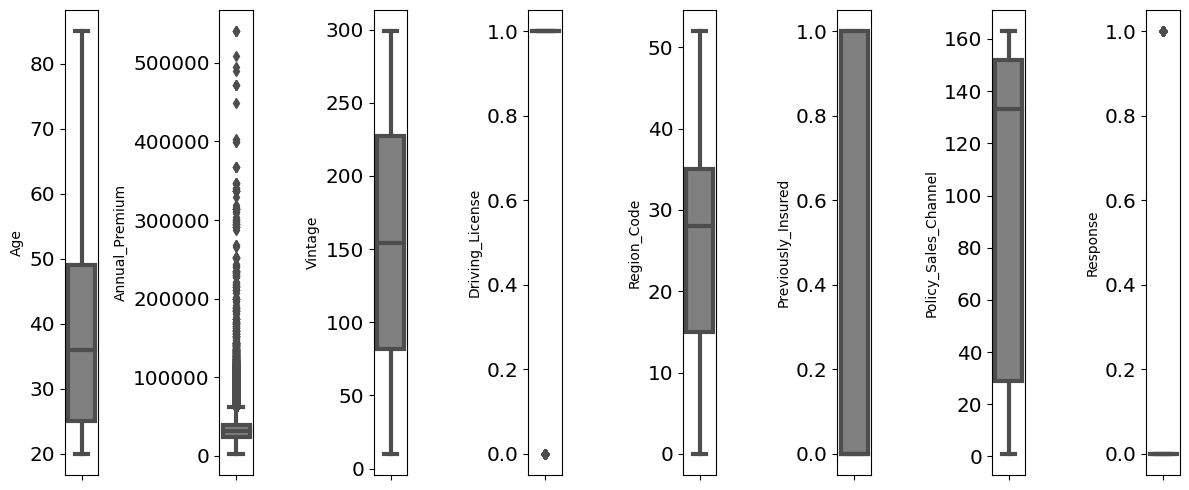

In [24]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

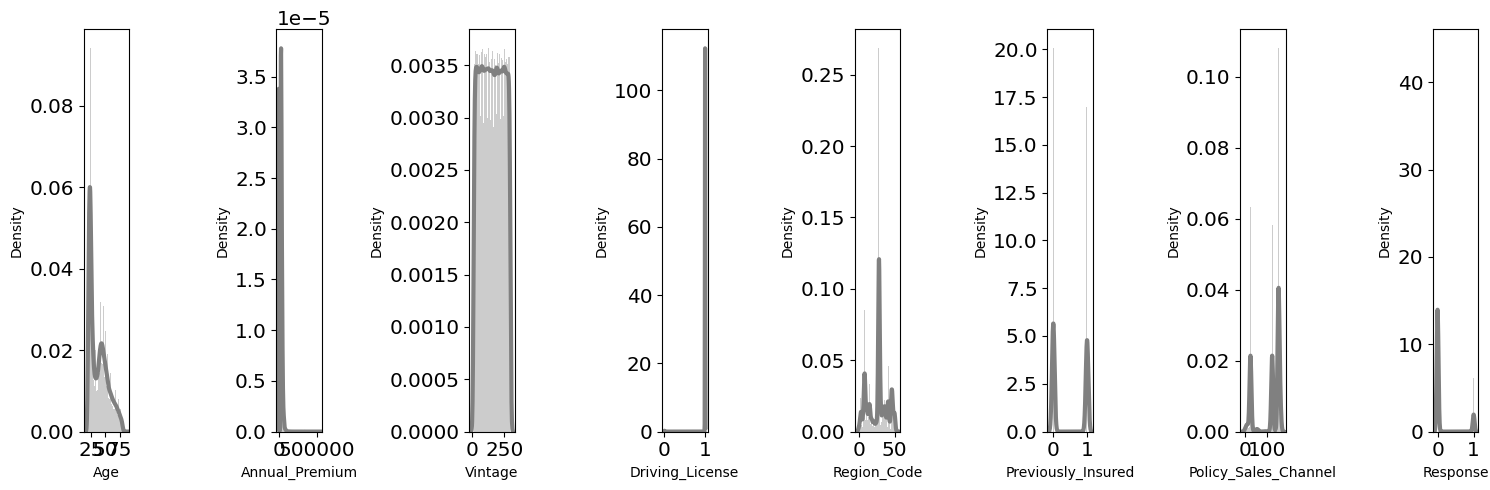

In [29]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(data[nums[i]], color='gray')
    plt.tight_layout()

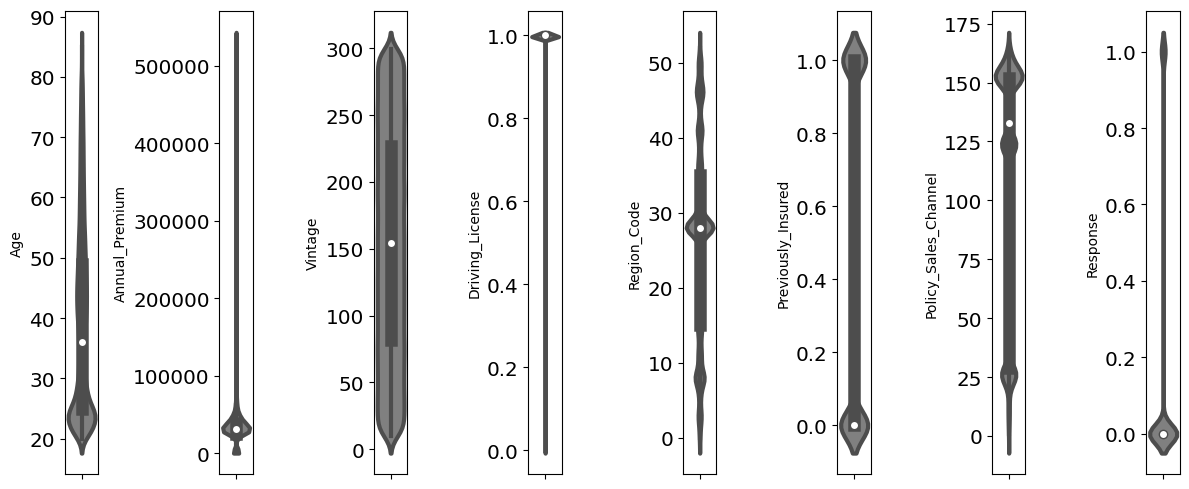

In [31]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [32]:
q1 = data["Annual_Premium"].quantile(0.25)
q3 = data["Annual_Premium"].quantile(0.75)

iqr = q3 - q1

batas_minimum = q1 - (1.5 * iqr)
batas_maksimum = q3 + (1.5 * iqr)

print(f"Batas minimum: {batas_minimum}")
print(f"Batas maksimum: {batas_maksimum}")

Batas minimum: 1912.5
Batas maksimum: 61892.5


Variabel Annual_Premium mempunyai distribusi right skewed. Outliers di variabel tersebut berada di atas batas maksium 61892.5 yang mengakitbatkan mean jauh lebih tinggi daripada median. Ini juga bisa dilihat dari boxplot, violin plot dan density plot di atas.